# TP5 - Equations & Systèmes Différentiels d'ordre 1

#### Les objectifs de ce cinquième TP sont de se familiariser avec
 - la résolution numérique des équations différentielles (EDO) du premier ordre (partie 1):
     - Prise en main : $\sim$ 45 minutes
     - Evaluation : $\sim$ 45 minutes
 - la résolution numérique des systèmes différentiels du premier ordre et les moyens de visualisation associés (partie 2) - durée recommandée 1h30

#### Méthodologie
 - exécuter les cellules pour comprendre ce qui est programmé dans l'exemple qui vous est fourni
 - répondre aux questions
 - faire l'exercice proposé par vous même en vous inspirant de l'exemple
 - prendre le temps de retravailler après la séance pour vous préparer au TP6 sur le pendule pesant

#### Les librairies python de la séance

Les librairies (ou paquets) utilisés dans cette séance sont
* `matplotlib` qui permet de faire tout type de visualisation
* `numpy` qui permet de représenter les discrétisations sous forme de vecteurs (ou de matrices) et d'effectuer des opérations sur ces variables
* `scipy` qui regroupe de nombreux algorithmes pour le calcul scientifique dont le solveur d'ODE

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# 1 - Résolution numérique d'une EDO du premier ordre

## 1.1 - Présentation générale

Nous présentons ici le solveur `odeint` de la librairie `scipy` qui résout numériquement tout problème de Cauchy de la forme ci-dessous, c'est à dire une équation différentielle ordinaire sous sa forme explicite munie d'une condition intiale :

\begin{equation*}
\begin{cases}
y'(t) = g(t, y(t)), \ \forall t \in [t_0,t_0+T]\\
y(t_0) = y_0,
\end{cases}
\end{equation*}

où $y_0$ est une constante qui définit la condition initiale en $t = t_0$. Deux remarques ici :
- la fonction $g$ est une fonction de deux variables qui définit l'équation différentielle à résoudre
- l'inconnue $y(t)$ peut être une fonction à valeurs réelles ou dans $\mathbb{R}^2$ (on notera alors $Y(t) = \left(\begin{align*}y_1(t)\\ y_2(t) \end{align*}\right)$ comme nous le verrons dans la partie suivante).

La [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) de la fonction indique pour le fonctionnement de base :

```
y = odeint(g, y0, t, tfirst=True)

# avec quatre arguments nécessaires (g, y0, t, tfirst=True)
# où :
# 1) g est la fonction qui définit l'EDO, sa signature d'appel doit être g(t,y)
# 2) y0 définit la condition initiale au temps initial
     (c'est à dire au temps t[0] le premier élément du tableau t)
# 3) t est un tableau monodimensionnel qui contient les temps où la solution est calculée
# 4) tfirst=True est optionnel mais permet de préciser l'ordre des variables t et y
#    avec t en premier pour définir la fonction g(t,y)
```
$\textbf{En sortie}$ : un tableau monodimensionnel y qui contient les valeurs de la fonction inconnue y
             aux temps du tableau t 

## 1.2 - Exemple

Nous voulons résoudre le problème de Cauchy suivant :
\begin{equation*}
\begin{cases}
y'(t) + y(t)= t , \ \forall t >0 \\
y(0) = 0,
\end{cases}
\end{equation*}

dont la solution exacte (que vous devriez savoir calculer analytiquement) est $y(t) = e^{-t} + t - 1$.

Il faut tout d'abord définir la fonction $g$ en réécrivant l'ODE sous sa forme explicite
$
y'(t) = - y(t) + t
$
ce qui permet de définir $g(t,y(t)) = -y(t) + t$.

Puis la résolution numérique requiert de choisir un intervalle de temps pour réprésenter cette fonction.
On choisit ici de prendre $t\in[0,3]$ avec $N=301$ points, c'est à dire un pas de temps de $\delta t=0.01$ pour les $N-1=300$ intervalles dans $[0,3]$.

In [34]:
############################################
## RESOLUTION NUMERIQUE
############################################
## Définition de la fonction g
def g(t,y):
    return -y +t
## Condition initiale
y0 = 0
## Les N temps où la solution est calculée dans l'intervalle [t0,t0+T]
t0 = 0
T = 3
N = 301
t = np.linspace(t0, t0+T, N)
## Calcul de la solution numérique
y = odeint(g, y0, t, tfirst=True)

In [35]:
301/2

150.5

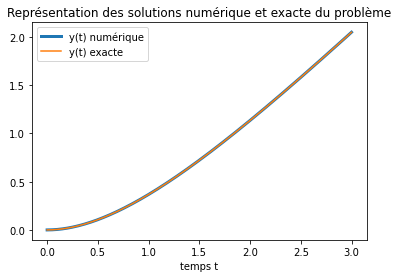

In [36]:
############################################
## REPRESENTATION GRAPHIQUE  
############################################
## - la solution numérique
plt.plot(t, y, lw=3, label='y(t) numérique')
## - la solution exacte
y_exacte = np.exp(-t) + t - 1
plt.plot(t, y_exacte, label='y(t) exacte')
## 
plt.xlabel("temps t")
plt.title("Représentation des solutions numérique et exacte du problème")
plt.legend()

#### Question
Pourquoi a-t'on tracé les deux fonctions qui se superposent sur le graphe?

In [37]:
#Les deux fonctions tracées sur le graphe représentent la solution exacte et la solution numérique du problème 
#de valeur initiale y'(t) = -y(t) + t, y(0) = 0.

#En traçant ces deux fonctions sur le même graphe, nous pouvons visualiser la précision de la solution numérique par rapport à 
#la solution exacte. Si les deux courbes se superposent, cela signifie que la solution numérique est très proche de la solution 
#exacte, ce qui indique que la méthode numérique utilisée pour calculer la solution est précise.

#En comparant les deux courbes, nous pouvons également identifier des écarts ou des différences, 
#qui peuvent être utilisés pour évaluer la précision de la méthode numérique utilisée. 

#Si la courbe de la solution numérique s'écarte considérablement de la courbe de la solution exacte, 
#cela peut indiquer que la méthode numérique utilisée n'est pas assez précise pour résoudre le problème.

## 1.3 - EVALUATION - à vous de faire en 45 minutes

### Modalités
- Renommez ce notebook en "TP5_NOM_Prenom.ipynb"
- A la fin de la séance, enregistrez ce notebook complété : "Fichier"->"Télécharger au format"->"Notebook (.ipynb)" sur l'ordinateur 
- Envoyez-le en pièce jointe par email à l'adresse donnée par votre enseignant

Vous utiliserez votre $\textbf{adresse étudiante}$ [LIEN VERS VOTRE MESSAGERIE](http://webmail.etu.univ-grenoble-alpes.fr/)

- Indiquez vos nom, prénom, parcours et groupe dans la cellule suivante

In [38]:
###########################
# NOM : FORSON
# PRENOM : Kaya
# PARCOURS & GROUPE : GMP 2
###########################

### Répondez aux questions suivantes pour le problème donné par votre enseignant 

#### Question 1
Calculer numériquement la solution du problème pour un pas de temps de $\delta t=0.02$.

In [39]:
############################################
## RESOLUTION NUMERIQUE
############################################
## Définition de la fonction g
def g(t,y):
    return -y/2 + (3/2)*np.exp(t/2)
## Condition initiale
y0=0
## Les N temps où la solution est calculée dans l'intervalle [t0,t0+T]
t0 = -1
T = 3
#pas de temps = 0,02 ce qui correspond dont à N = 151 points
N = 151
t = np.linspace(t0, t0+T, N)
## Calcul de la solution numérique
y = odeint(g, y0, t, tfirst=True)



#### Question 2 (sur feuille que vous rendrez à votre enseignant)
Calculer analytiquement la solution $y(t)$ du problème.

#### Question 3
Représenter la solution numérique et la solution exacte sur le même graphe.

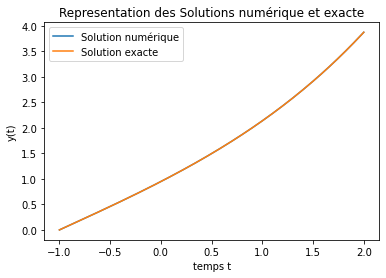

In [40]:
############################################
## REPRESENTATION GRAPHIQUE  
############################################

## Calcul de la solution exacte
y_exacte=((-(3/2)*np.exp(-1/2))/np.exp(1/2))*np.exp(-t/2)+(3/2)*np.exp(t/2)

    
   
## Représentation graphique
plt.plot(t, y, label='Solution numérique')
plt.plot(t, y_exacte, label='Solution exacte')
plt.xlabel('temps t')
plt.ylabel('y(t)')
plt.legend()
plt.title('Representation des Solutions numérique et exacte')
plt.show()


# 2 - Résolution numérique d'un système différentiel 2x2 du premier ordre

## 2.1 - Présentation générale

Le solveur `odeint` fonctionne de manière identique pour résoudre maintenant un système différentiel du premier ordre, c'est à dire (en reprenant les notations du cours) un problème de Cauchy portant sur la fonction vectorielle $Y(t)$ :

\begin{equation*}
\begin{cases}
Y'(t) = G(t, Y(t)), \ \forall t \in [t_0,t_0+T]\\
Y(t_0) = Y_0.
\end{cases}
\end{equation*}

Quelques différences sont minimes mais cependant importantes :
 - L'inconnue $Y(t)$ est un vecteur qui contient les 2 fonctions inconnues du système différentiel : $Y(t) = \left(\begin{align*}y_1(t)\\ y_2(t) \end{align*}\right)$
 - La condition initiale $Y_0$ est un vecteur qui contient les valeurs que l'on se donne de $y_1(t=t_0)$ et $y_2(t=t_0)$
 - La fonction $G$ renvoie 2 composantes, une pour chacune des équations différentielles
 - $\textbf{En sortie}$ : un tableau bidimensionnel qui contient les valeurs des fonctions inconnues aux temps du tableau t
 
     - $y_1$ dans la première colonne
     - $y_2$ dans la seconde colonne
     

## 2.2 - Exemple

Il s'agit de l'[exemple du cours](https://moodle.caseine.org/pluginfile.php/183304/mod_resource/content/2/Seance.11.pdf)
c'est à dire le système différentiel

\begin{equation*}
\begin{cases}
y_1'(t) = y_1(t) + y_2(t) \\
y_2'(t) = -y_1(t) + y_2(t)
\end{cases}
\ \ \forall t >0
\end{equation*}

muni des conditions initiales $y_1(0)=2$ et $y_2(0)=-3$.

La formulation vectorielle de ce système est bien de la forme
\begin{equation*}
\begin{cases}
Y'(t) = G(t, Y(t)) \\
Y(t_0) = Y_0
\end{cases}
\end{equation*}

où $
G(t, Y(t)) = G
\left(t,
\left(\begin{array}{c}
y_1(t)\\
y_2(t)
\end{array}
\right)\right)
=
\left(
\begin{array}{c}
y_1(t) + y_2(t) \\
-y_1(t) + y_2(t)
\end{array}
\right)
=
\left(
\begin{array}{cc}
1&1\\
-1&1
\end{array}
\right)
\left(\begin{array}{c}
y_1(t)\\
y_2(t)
\end{array}
\right)
$ et $ Y_0 = \left(\begin{array}{c}
2\\
-3
\end{array}
\right)
$.

$\textbf{NB}$ : l'obtention de la solution exacte de ce système se trouve dans le [cours](https://moodle.caseine.org/pluginfile.php/183304/mod_resource/content/2/Seance.11.pdf).

Comme précédemment, la résolution numérique requiert de choisir un intervalle de temps et on choisit ici de prendre $t\in[0,3.5]$ avec $N=351$ points (pas de temps de $\delta t=0.01$).

In [41]:
############################################
## RESOLUTION NUMERIQUE
############################################
## Définition de la fonction G en utilisant la matrice A
A=np.array([[1,1],[-1,1]])
def G(t,Y): # comme le produit matriciel de la matrice A par le vecteur Y    
    return np.array([A[0,0]*Y[0]+A[0,1]*Y[1],
                     A[1,0]*Y[0]+A[1,1]*Y[1]])
############################################
## Condition initiale
Y0 = [2,-3]
## Les N temps où la solution est calculée dans l'intervalle [t0,t0+T]
t0 = 0
T = 3.5
N = 351
t = np.linspace(t0, t0+T, N)
## Calcul de solution numérique
Y = odeint(G, Y0, t, tfirst=True)

#### Questions
- Représenter sur le même graphe les solutions numériques $y_1(t)$ et $y_2(t)$ en fonction du temps.
- Comparer ces solutions numériques avec les solutions exactes vues en [cours](https://moodle.caseine.org/pluginfile.php/183304/mod_resource/content/2/Seance.11.pdf).

ValueError: x and y must have same first dimension, but have shapes (351,) and (151, 1)

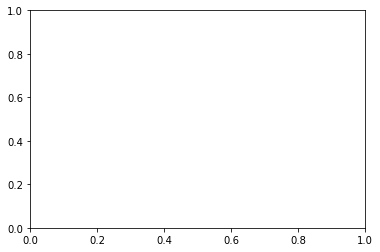

In [42]:
############################################
## REPRESENTATION GRAPHIQUE  
############################################

## Calcul de la solution exacte
y_exacte=((-(3/2)*np.exp(-1/2))/np.exp(1/2))*np.exp(-t/2)+(3/2)*np.exp(t/2)

    
   
## Représentation graphique
plt.plot(t, y, label='Solution numérique')
plt.plot(t, y_exacte, label='Solution exacte')
plt.xlabel('temps t')
plt.ylabel('y(t)')
plt.legend()
plt.title('Representation des Solutions numérique et exacte')
plt.show()


## 2.3 - Réprésentations graphiques dans le plan de phase
Les cellules ci-dessous permettent, pour l'exemple proposé en section 2.2, de représenter :
- le champ de vecteurs vitesse associé au système différentiel
- la trajectoire associée au problème de Cauchy

Exécutez ces cellules pour comprendre ce qui est programmé et réprésenté graphiquement.

In [43]:
############################################
## Quantités nécessaires à la représentation graphique pour Y calculé précédemment
############################################
## Définition de la fenêtre graphique
y1min = min(Y[:,0])
y1max = max(Y[:,0])
y2min = min(Y[:,1])
y2max = max(Y[:,1])
axe_lim = max(abs(y1min),abs(y1max),abs(y2min),abs(y2max))
## Discrétisation du plan de phase avec 10 points dans chaque direction
## et créaction de la grille
y1 = np.linspace(-axe_lim,axe_lim,10)
y2 = np.linspace(-axe_lim,axe_lim,10)
XX,YY = np.meshgrid(y1,y2) 
## Vitesse en chaque point de la grille
VX,VY = G(0,[XX,YY])

#### Questions
- Quelle est la structure (et dimension) des variables XX et YY ?
- Que contiennent ces tableaux XX et YY
- Quelle est la structure (et dimension) des variables VX et VY ?
- Que représentent ces variables ? 

In [44]:
#La variable XX est un tableau de dimension 2 (matrice) de taille 10x10 et YY est également un tableau de dimension 2 (matrice) de taille 10x10.
#Ces tableaux contiennent les coordonnées de la grille de discrétisation du plan de phase. Plus précisément, XX contient les coordonnées en abscisse et YY contient les coordonnées en ordonnée.
#Les variables VX et VY sont également des tableaux de dimension 2 (matrice) de taille 10x10.
#Ces tableaux représentent les vitesses en chaque point de la grille. Plus précisément, VX contient les vitesses en abscisse et VY contient les vitesses en ordonnée. Ces vitesses correspondent aux valeurs de la fonction G en chaque point de la grille.

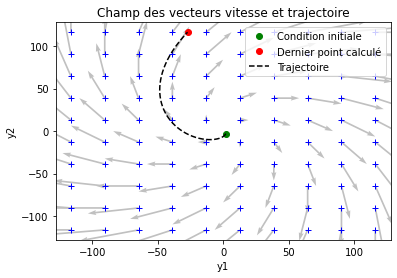

In [13]:
############################################
## Représentation graphique dans le champ de phase
## Option 1 ##
############################################
## Affichages :
## - points de la grille
plt.plot(XX, YY, "+b")
## - vecteurs vitesse
plt.quiver(XX,YY,VX,VY,angles='xy',scale_units='xy',scale=4,color="silver",width=0.005)
## - condition initiale
plt.plot(Y[0,0],Y[0,1],'o',color="green", label="Condition initiale")
## - dernier point de la simulation
plt.plot(Y[N-1,0],Y[N-1,1],'o',color="red", label="Dernier point calculé")
## - trajectoire
plt.plot(Y[:,0],Y[:,1],'k--', label="Trajectoire")
############################################ 
plt.title("Champ des vecteurs vitesse et trajectoire")
plt.xlabel("y1")
plt.ylabel("y2")
plt.legend()

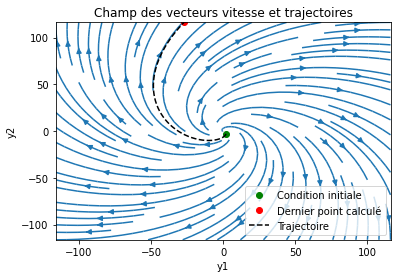

In [14]:
############################################
## Représentation graphique dans le champ de phase
## Option 2 ##
############################################
## Affichages :
## - lignes de courant (trajectoires virtuelles)
plt.streamplot(XX, YY, VX, VY)
## - condition initiale
plt.plot(Y[0,0],Y[0,1],'o',color="green", label="Condition initiale")
## - dernier point de la simulation
plt.plot(Y[N-1,0],Y[N-1,1],'o',color="red", label="Dernier point calculé")
## - trajectoire
plt.plot(Y[:,0],Y[:,1],'k--', label="Trajectoire")
############################################ 
plt.title("Champ des vecteurs vitesse et trajectoires")
plt.xlabel("y1")
plt.ylabel("y2")
plt.legend()

## 2.4 - EXERCICE - à vous de faire

#### Question 1
Résoudre numériquement le système différentiel 
\begin{equation*}
\begin{cases}
y_1'(t) = y_2(t) \\
y_2'(t) = -y_1(t)
\end{cases}
\ \ \forall t >0
\end{equation*}

muni des conditions initiales $y_1(0)=1$ et $y_2(0)=1$.

$\textbf{NB}$ : vous prendrez par exemple un intervalle de temps $[0,5]$ avec un pas de temps de $\delta t=0.01$.

#### Question 2
Représenter sur le même graphe les solutions numériques $y_1(t)$ et $y_2(t)$ en fonction du temps pour $t\in[0,5]$.

In [15]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
## Avec la première courbe nous pouvons dire que l'angle semble suivre l'évolution de la fonction cosinus, cependant
## on ne peut rien dire sur l'amplitude car le temps est trop petit
########################################
##Si on augmente  le temps on remarque que l'amplitude ne diminue pas (normal si il n'y a pas de frottements).

#### Question 3
Qu'observe t'on quand on résoud pour $t\in[0,10]$?

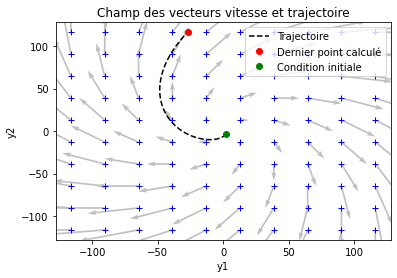

In [16]:
###############################################
## UTILISER CETTE CELLULE POUR REPRESENTER : ##
## - LA TRAJECTOIRE                          ##
## - LE CHAMP DE VECTEURS VITESSE            ##
###############################################

############################################
## Quantités nécessaires à la représentation graphique pour Y calculé précédemment
############################################
## Définition de la fenêtre graphique
y1min = min(Y[:,0])
y1max = max(Y[:,0])
y2min = min(Y[:,1])
y2max = max(Y[:,1])
axe_lim = max(abs(y1min),abs(y1max),abs(y2min),abs(y2max))
## Discrétisation du plan de phase avec 10 points dans chaque direction
## et créaction de la grille
y1 = np.linspace(-axe_lim,axe_lim,10)
y2 = np.linspace(-axe_lim,axe_lim,10)
XX,YY = np.meshgrid(y1,y2) 
############################################
## A COMPLETER ...
plt.plot(Y[:,0],Y[:,1],'k--', label="Trajectoire")
plt.quiver(XX,YY,VX,VY,angles='xy',scale_units='xy',scale=4,color="silver",width=0.005)
plt.plot(Y[N-1,0],Y[N-1,1],'o',color="red", label="Dernier point calculé")
plt.plot(Y[0,0],Y[0,1],'o',color="green", label="Condition initiale")
plt.plot(XX, YY, "+b")
plt.title("Champ des vecteurs vitesse et trajectoire")
plt.xlabel("y1")
plt.ylabel("y2")
plt.legend()

#### Question 4
Représenter le champ de vecteurs vitesse dans le plan de phase.

In [17]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
##On remarque que y1 diminue dans un tremier temps on passe de y1 ~= 1.5 à y1 ~= -1.5 .
##On en déduit que l'angle diminue aussi.
##On remarque également que lorsque y1 s'annule alors y2 connait un extremum, c'est à dire que la norme d la vitesse et 
##au maximum. Inversement quand la norme de l'angle est au maximum y2 est nul (la vitesse s'annule).


#### Question 5
Représenter la trajectoire des solutions dans le plan de phase pour :
- $t\in[0,5]$
- $t\in[0,10]$

Quelle remarque pouvez-vous faire?

In [18]:
## Définition de la fonction F linéaire dans le cas sans frottement
A=np.array([[0,1],[-(omega*omega),0]])
def F(t,Y): 
    return np.array([A[0,0]*Y[0]+A[0,1]*Y[1],
                     A[1,0]*Y[0]+A[1,1]*Y[1]])

NameError: name 'omega' is not defined

In [19]:
## Calcul de solution numérique
Y2 = odeint(F, Y0, t, tfirst=True)

NameError: name 'F' is not defined

#### Question 6
Calculer tous les points d'équilibre du système différentiel.

$\textbf{NB}$ : c'est à dire l'ensemble des points stationnaire $Y_e$ dans le plan de phase.

In [20]:
############################################
## REPRESENTATION GRAPHIQUE de l'ANGLE en fonction du temps 
#############################d###############
plt.plot(t, Y2[:,0], label='angle y(t)')
## 
plt.xlabel("temps t")
plt.ylabel("angle rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()

NameError: name 'Y2' is not defined

#### Question 7
Etudier analytiquement la nature de l'unique point d'équilibre $ Y_e = \left(\begin{array}{c}
0\\
0
\end{array}
\right)
$.

$\textbf{NB}$ : Vous pourrez consulter la [classification](https://moodle.caseine.org/pluginfile.php/145137/mod_resource/content/0/types_equilibre.pdf) présentée en cours.

In [21]:
####################################################
## UTILISER CETTE CELLULE POUR TRACER LES COURBES ##
####################################################
plt.plot(t, Y2[:,0], label='angle y(t) cas petites amplitudes')
plt.plot(t, Y[:,0], label='angle y(t) cas général')
## 
plt.xlabel("temps t")
plt.ylabel("angle rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()

NameError: name 'Y2' is not defined

In [22]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
## On remarque que les courbes ne correspondent pas entre elles, cela peut etre expliqué car les angle étudié sont
## trop grand pour cette aproximation.
## L'approximation n'est pas juste.

In [23]:
####################################################
## UTILISER CETTE CELLULE POUR TRACER LES COURBES ##
####################################################
theta0 = 0.1*np.pi
Y0 = [theta0,v0]
Y2 = odeint(F, Y0, t, tfirst=True)
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y2[:,0], label='angle y(t) cas petites amplitudes')
plt.plot(t, Y[:,0], label='angle y(t) cas général') 
plt.xlabel("temps t")
plt.ylabel("angle rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()

NameError: name 'v0' is not defined

In [24]:
##########################################
## UTILISER CETTE CELLULE POUR REPONDRE ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
## En faisant diminué plusieur fois la valeur de theta on remarque que l'approximation devient de plus en plus juste.
## Cette approximation semble etre correct en dessous d'un angle de pi/10 (theta max)


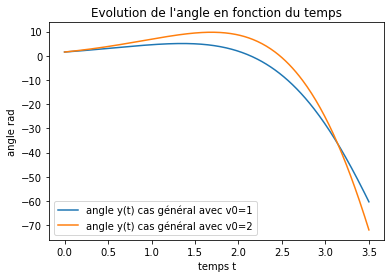

In [26]:
v0 = 1
theta0 = 0.5*np.pi
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='angle y(t) cas général avec v0=1') 
plt.xlabel("temps t")
plt.ylabel("angle rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()
v0 = 2
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='angle y(t) cas général avec v0=2') 
plt.xlabel("temps t")
plt.ylabel("angle rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()
##########################################
## EXPLICATIONS                         ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
## On utilise le cas générale pour etre le plus préçis possible
## Quand vo=1 on remarque que l'angle évolue comme une courbe cosinusoidal avec un dephasage négatif (car la courbe 
## commence par croitre) et une amplitude supérieur à theta 0
##Quand vo=2 on remarque que l'angle ne fait que croitre,ceci veut dire que le pendule fait des tours.


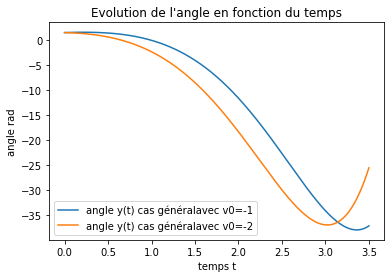

In [27]:
## Cas v0 négative
####################################################### 
## RESOLUTION et REPRESENTATION de l'EXEMPLE CHOISI  ##
#######################################################
v0 = -1
theta0 = 0.5*np.pi
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='angle y(t) cas généralavec v0=-1') 
plt.xlabel("temps t")
plt.ylabel("angle rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()
v0 = -2
theta0 = 0.5*np.pi
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='angle y(t) cas généralavec v0=-2') 
plt.xlabel("temps t")
plt.ylabel("angle rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()
##########################################
## EXPLICATIONS                         ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
## Quand vo=-1 on remarque que l'angle évolue comme une courbe cosinusoidal avec un dephasage positif (car la courbe 
## commence par decroitre) et une amplitude supérieur à theta 0.
## Quand vo=-2 on remarque que l'angle ne fait que decroitre,ceci veut dire que le pendule fait des tours.


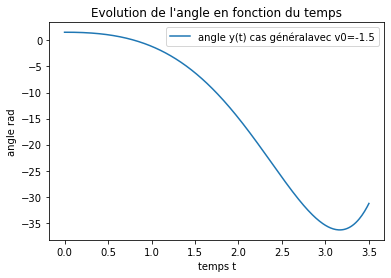

In [28]:
## Cas v0 = -1.5
####################################################### 
## RESOLUTION et REPRESENTATION de l'EXEMPLE CHOISI  ##
#######################################################
v0 = -1.5
theta0 = 0.5*np.pi
Y0 = [theta0,v0]
Y = odeint(G, Y0, t, tfirst=True)
plt.plot(t, Y[:,0], label='angle y(t) cas généralavec v0=-1.5') 
plt.xlabel("temps t")
plt.ylabel("angle rad")
plt.title("Evolution de l'angle en fonction du temps")
plt.legend()
##########################################
## EXPLICATIONS                         ##
## EN UTILISANT le mode COMMENTAIRE.    ##
##########################################
## Quand vo=-1.5 on remarque que l'angle ne fait que decroitre,ceci veut dire que le pendule fait des tours
